<a href="https://colab.research.google.com/github/Sheha1218/Covid/blob/main/chest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehangunathilaka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database


100%|██████████| 778M/778M [00:07<00:00, 104MB/s] 


In [ ]:
data_dir=('/content/covid19-radiography-database/COVID-19_Radiography_Dataset')

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)
validation_data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                    image_size=IMAGE_SIZE,
                                                                     batch_size=BATCH_SIZE,
                                                                    subset='validation',
                                                                    validation_split=0.1,
                                                                     seed=42)

Found 42330 files belonging to 4 classes.
Using 38097 files for training.
Found 42330 files belonging to 4 classes.
Using 4233 files for validation.


In [ ]:
data.class_names

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
for image_batch,label_batch in data.take(1):
  print(f'image batch = {image_batch.shape}')
  print(f'label batch size = {label_batch.shape}')

image batch = (32, 256, 256, 3)
label batch size = (32,)


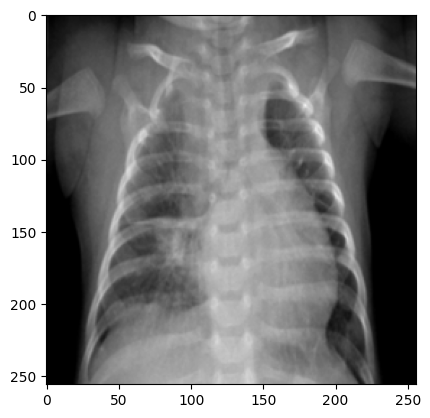

In [ ]:
for image_batch,label_batch in data.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))

In [ ]:
data=data.map(lambda x,y:(x/225,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))

In [ ]:
data_augmentation=tf.keras.Sequential(
    [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomSharpness(0.2)



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model=tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(4,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,956 (56.65 MB)

 Trainable params: 14,849,700 (56.65 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history=model.fit(data,epochs=25,validation_data=validation_data)

Epoch 1/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 150s 118ms/step - accuracy: 0.5405 - loss: 1.0614 - val_accuracy: 0.6045 - val_loss: 0.9212
Epoch 2/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 137s 115ms/step - accuracy: 0.6094 - loss: 0.9043 - val_accuracy: 0.6282 - val_loss: 0.8897
Epoch 3/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 142s 115ms/step - accuracy: 0.6312 - loss: 0.8603 - val_accuracy: 0.4722 - val_loss: 1.0636
Epoch 4/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 141s 118ms/step - accuracy: 0.6393 - loss: 0.8408 - val_accuracy: 0.6423 - val_loss: 0.8482
Epoch 5/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.6459 - loss: 0.8253 - val_accuracy: 0.5488 - val_loss: 0.9568
Epoch 6/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 139s 117ms/step - accuracy: 0.6625 - loss: 0.7988 - val_accuracy: 0.4517 - val_loss: 1.2025
Epoch 7/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 141s 116ms/step - accuracy: 0.6688 - loss: 0.7902 - val_accuracy: 0.5408 - val_loss: 0.9617
Epoch 8/25
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 141s 118ms/step - ac

In [ ]:
history.history

{'accuracy': [0.5703073740005493,
  0.6114392280578613,
  0.6295771598815918,
  0.6429902911186218,
  0.6485549807548523,
  0.660366952419281,
  0.6670341491699219,
  0.669212818145752,
  0.6778224110603333,
  0.6819697022438049,
  0.6865107417106628,
  0.685382068157196,
  0.6900280714035034,
  0.6960653066635132,
  0.698453962802887,
  0.6954353451728821,
  0.7006588578224182,
  0.7018925547599792,
  0.7065910696983337,
  0.7071685194969177,
  0.7123132944107056,
  0.7156993746757507,
  0.7133370041847229,
  0.7181143164634705,
  0.7177730798721313],
 'loss': [0.9864721298217773,
  0.8964152336120605,
  0.8601531386375427,
  0.8377271890640259,
  0.8237237930297852,
  0.8024229407310486,
  0.7914240956306458,
  0.7840027213096619,
  0.7676090598106384,
  0.7623404264450073,
  0.7563045620918274,
  0.7527641654014587,
  0.7404487133026123,
  0.7322505712509155,
  0.7306554913520813,
  0.7280371785163879,
  0.72111576795578,
  0.7213413119316101,
  0.7090441584587097,
  0.7091526389122

In [ ]:
import matplotlib.pyplot as plt

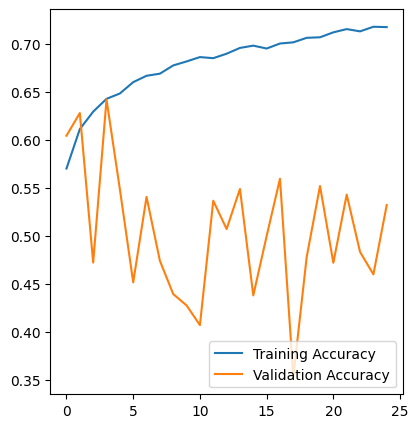

In [ ]:
epochs=25
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epochs),history.history['accuracy'],label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

In [ ]:
model.save('model_chest.h5', include_optimizer=False)

TypeError: cannot pickle 'module' object